<a href="https://colab.research.google.com/github/Yomunozs/Senales_Sistemas/blob/main/Parcil_3/Parcial_3_parte_2_SyS_Codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='magenta'>#######################################################################################################</font>
# <font color='blue'>Numeral 2.</font>


<font color='green'>**Se trabaja apartir de varios cuadernos de apoyo youtube_detector.ipynb, 4_ModulacioAM,ipynb,...**</font>



<font color='green'>**La primera parte consiste en obtener el tramo de cancion especificado del segundo 20 al 25. El ccual va a ser el mensaje a modular en amplitud.**

**En esta parte se utiliza parte del codigo generado para el detector de genero y del cuaderno de ayuda sobre modulacion AM**</font>


In [1]:
#se instalan librerias necesarias
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile #instalar sondfile

import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import yt_dlp as youtube_dl
import subprocess
import os
import soundfile as sf # para instalar pip install soundfile




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 11.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 8.1 MB/s eta 0:00:00
  Created w

In [2]:
#funcion para descargar mp3 desde youtube, definida en cuadernos de guia anteriores
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

cancion = "https://youtu.be/3YxaaGgTQYM?si=g5VHXSkOv5uv-UDk"# cancio escogida
download_ytvid_as_mp3(cancion,"cancion") # se utiliza la funcion para descargar la cancion de youtube

cancion = "cancion"#Se define la variable que va a contener la cancion
subprocess.call(['ffmpeg','-y', '-i', cancion+'.mp3',
                   cancion+'.wav'])#Se cambia el formato a uno mas completo

#leer la cancion, para determinar su valor en terminos computacionales y determinar la frecuencia de muestreo utilizada por el origen
nombre_out = "cancion.wav"
x, fs = sf.read(cancion+'.wav')#x datos de la canción, fs frecuencia de muestreo de la cancion



[youtube] Extracting URL: https://youtu.be/3YxaaGgTQYM?si=g5VHXSkOv5uv-UDk
[youtube] 3YxaaGgTQYM: Downloading webpage
[youtube] 3YxaaGgTQYM: Downloading ios player API JSON
[youtube] 3YxaaGgTQYM: Downloading android player API JSON
[youtube] 3YxaaGgTQYM: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=3YxaaGgTQYM
[youtube] 3YxaaGgTQYM: Downloading webpage
[youtube] 3YxaaGgTQYM: Downloading ios player API JSON
[youtube] 3YxaaGgTQYM: Downloading android player API JSON
[youtube] 3YxaaGgTQYM: Downloading m3u8 information
[info] 3YxaaGgTQYM: Downloading 1 format(s): 251
[download] Destination: cancion.mp3
[download] 100% of    3.81MiB in 00:00:00 at 22.24MiB/s  


In [3]:
fs #valor de fs

48000

<font color='green'>**Ahora, se adecua la cancion y se toma el tramo para modular**</font>


In [4]:

xcopia = x.copy() #copiar archivos para procesar,sin afectar la cancion
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xcopia[int(ti*fs):int((tf*fs)),0] #Se obtiene el mensaje requerido
from IPython.display import Audio #reproducir segmento
Audio(m.T,rate=fs)


<font color='green'>**Se presenta en graficas la composicion del tramo selecccionado y su apariencia antes de ser modulada**</font>


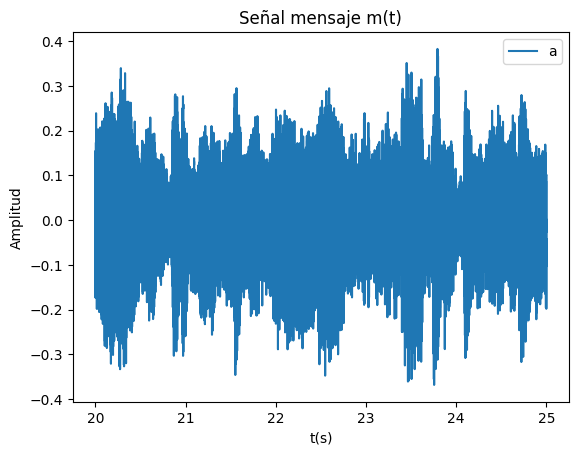

In [5]:
#Señal mensaje en función del tiempo
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.title(r'Señal mensaje m(t)')
plt.xlabel('t(s)')
plt.ylabel('Amplitud')
plt.legend("amplitud vs tiempo")
plt.show()

<font color='green'>**Teniendo en cuenta el procedimiento para modulacion de mensajes, se calcula la transformada de fourier del mensaje y se grafica su espectro**</font>

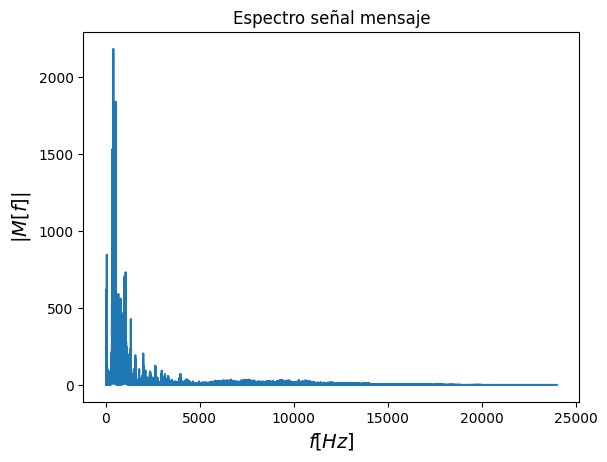

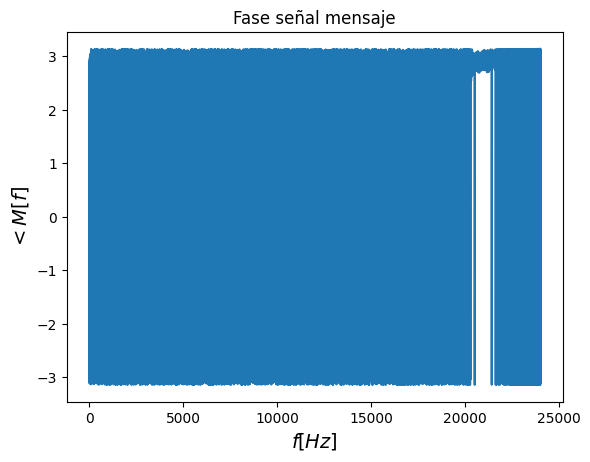

In [6]:

#Fourier por medio de rfft
Mw = np.fft.rfft(m) # luego de la fransformada, el mensaje queda en terminos de frecuencia
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Mw))#fase del espectro
plt.title(r'Fase señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M[f]$',fontsize = 14)
plt.show()

<font color='green'>**La grafica se ve saturada debido a que la frecuencia de muestreo es muy elevada**

**a partir de las graficas se puede determinar una frecuencia portadora adecuado para el mensaje a enviar**</font>

In [7]:
Fc = 20000 #la frecuencia portadora debe ser >> que fmax del mensaje
Im = 1 # de la ecuacion de Im se despeja Ac sabiendo que el indice de modulacion esta en 1, asi:Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*tt) #portadora, se toma laseñal portadora del ejercicio practico.

<font color='green'>**Se grafica la señal portadora**</font>

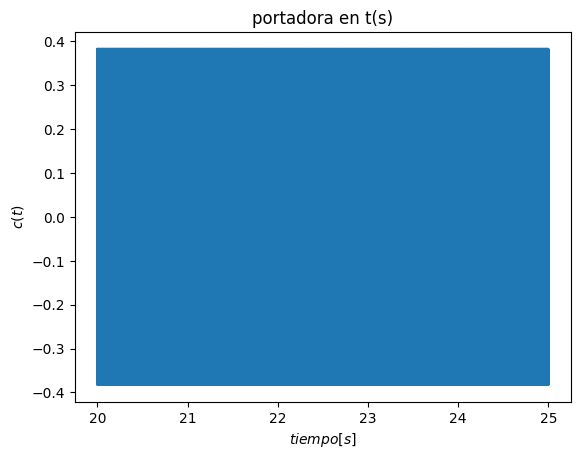

In [9]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal en el tiempo
plt.title(r'portadora en t(s)')
plt.xlabel('$tiempo [s]$')
plt.ylabel('$c(t)$')
plt.show()

<font color='green'>**Tambien se calcula la transformada dr fourier de la señal portadora**</font>

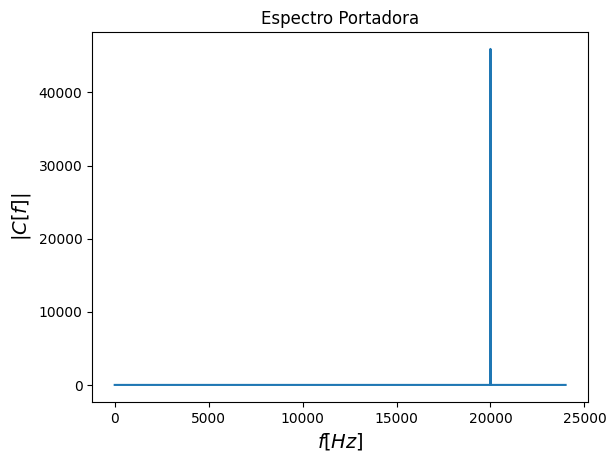

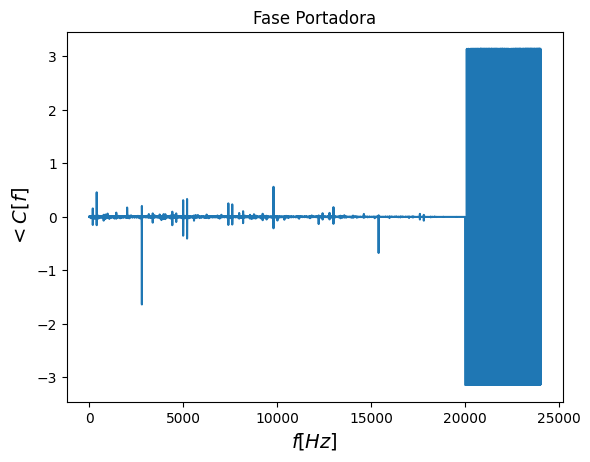

In [10]:
#Fourier señal portadora
Cw = np.fft.rfft(c)
plt.plot(vf,abs(Cw))#se grafica la magnitud de la señal portadora
plt.title(r'Espectro Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Cw))#fase del espectro con la fucion angle() de numpy
plt.title(r'Fase Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<C[f]$',fontsize = 14)
plt.show()

<font color='green'>**Teniendo el mensaje y la portadora, se puede calcular la señal modulada antes de meter los datos en la transformada de fourier, asi**</font>


In [15]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM
Audio(y.T,rate=fs)

<font color='green'>**Ahora si, se calcula su transformada de fourier y se obtiene el mensaje modulado en amplitudy se grafica su forma en frecuencia y en fase**</font>


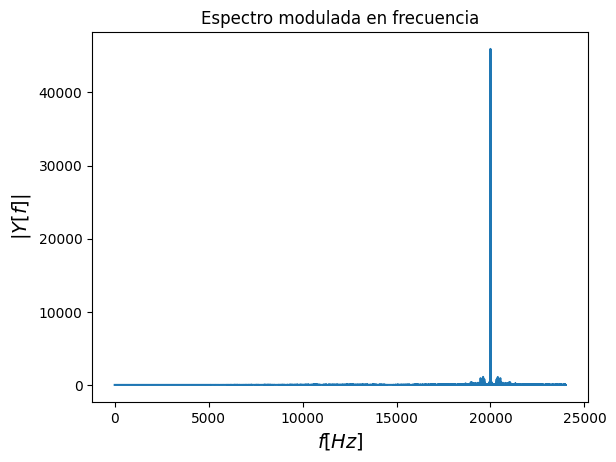

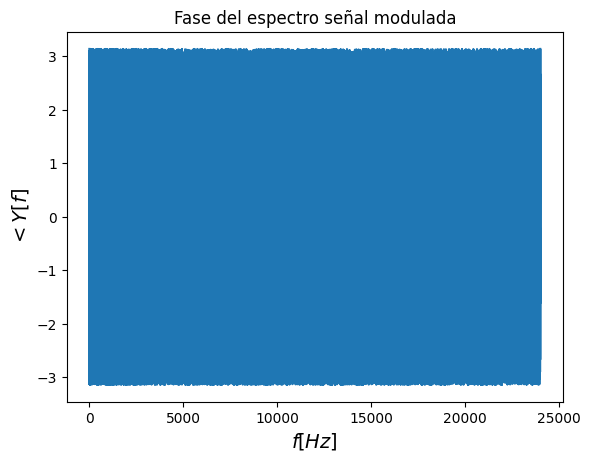

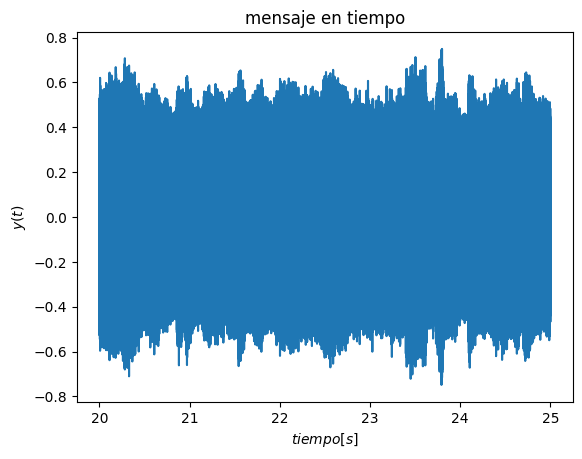

In [12]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # Se calcula la rfft de y
#Vf = np.fft.rfftfreq((y.shape[0],1/fs))
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada en frecuencia')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Yw))#fase del espectro con la funcion angle() de numpy
plt.title(r'Fase del espectro señal modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()

plt.plot(tt,y) #graficar señal  en el tiempo
plt.title(r'mensaje en tiempo')
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

<font color='green'>**Por ultimo se hace una comparacion entre el espectro en frecuencia de las tres señales manejadas en el ejercicio**</font>


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


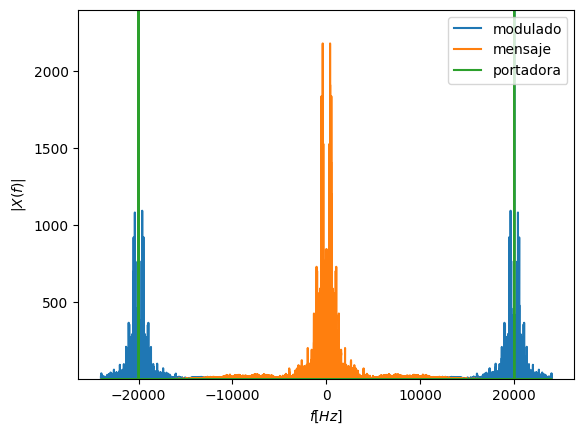

In [14]:
Xfc = np.fft.fft(c)#Señal portadora
Xfm = np.fft.fft(m)#Señal mensaje
Xfy = np.fft.fft(y)#Señal modulada

vfre = np.fft.fftfreq(len(c),1/fs)#vector de datos en frecuencia

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

<font color='green'>**Se evidencia en la grafica el espectro en frecencia de las señales, siendo la del centro la del mensaje con amplitud inferior y las de los lados, componentes de la señal modulada**</font>


<font color='green'>**Ahora se requiere demoduar la señal  utiizar filtros digitales para obtener nuevamente el mensaje**

</font>


<font color='green'>**Se utiliza una señal igual a la poortadora, con el fin de separar el mensaje de la señal portadora, debido a las identidades trigonometricas.**</font>


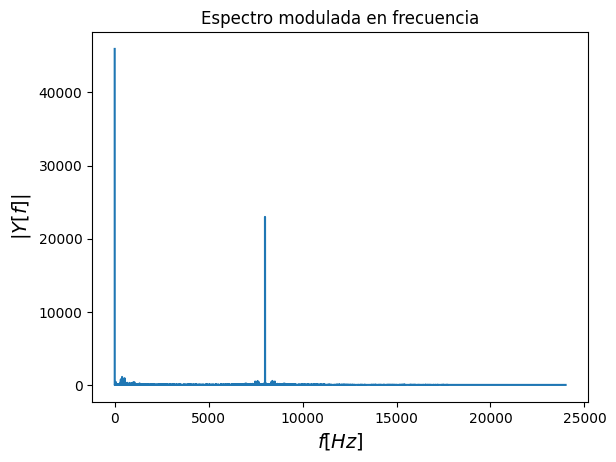

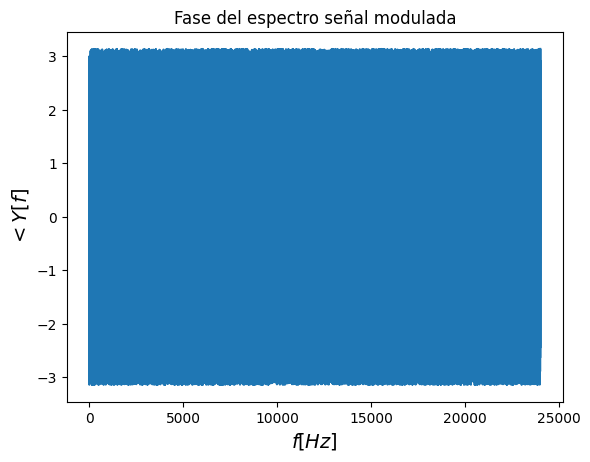

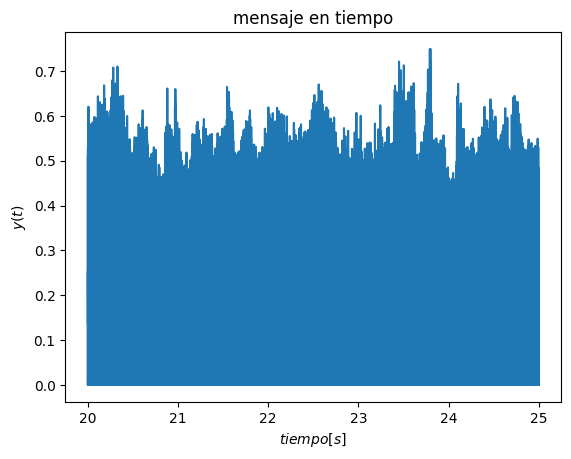

In [17]:
#Funcion para multiplicar y separar el mensaje de la señal modulada

f2 = np.cos(2*np.pi*Fc*tt)# Funcion coseno igual a la de la señal portadora
ca = y *f2 # Se operan las señales mudulada y coseno

#Se grafica el espectro en freccuenci en frecuencia y en tiempo

#Fourier señal modulada
Ywa = np.fft.rfft(ca) # Se calcula la rfft de y
#Vf = np.fft.rfftfreq((y.shape[0],1/fs))
plt.plot(vf,abs(Ywa))#se grafica la magnitud
plt.title(r'Espectro modulada en frecuencia')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Ywa))#fase del espectro con la funcion angle() de numpy
plt.title(r'Fase del espectro señal modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()

plt.plot(tt,ca) #graficar señal  en el tiempo
plt.title(r'mensaje en tiempo')
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

#En el espectro se evidencian el mensaje en frecuencias cercanas al cero y la señal modulada con el doble de frecuencia
Audio(ca.T,rate=fs) #Se reproduce la cancion en este punto

<font color='green'>**Ahora se desarolla la parte de filtrado, se utilizan 3 fltros diferentes, (bessel, butterworth, Chevysev 1**
</font>


In [ ]:
# librerias necesarias
from scipy.signal import butter as bw
from scipy.signal import lfilter, filtfilt
from scipy.signal import freqz_zpk
from scipy.signal import bessel
from scipy.signal import cheby1
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from scipy.signal import freqz #para este caso no se van a mostrar los polos y ceros

#Funcion para graficar respuesta en frecuencia del filtro
def plot_freq_response(filter_name, w, h, N): #Mostrar la respuesta en frecuencia del filtro
  fig = plt.figure()
  ax1 = fig.add_subplot(1, 1, 1)
  ax1.set_title(filter_name +' Digital filter frequency response, order= ' + str(N))
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')
  ax1.set_ylabel('Amplitude [dB]', color='b')
  ax1.set_xlabel('Frequency [Hz]')
  ax1.grid()
  ax2 = ax1.twinx()
  angles = np.unwrap(np.angle(h))
  ax2.plot(w, angles, 'g')
  ax2.set_ylabel('Angle [radians]', color='g')
  plt.axis('tight')
  plt.show()






<font color='green'>**Filtro Butterwoth. Dado que cuando se separa el mensaje de la portadora, este queda con su amlitud modificada, por lo tanto se compensa**
</font>


In [ ]:
filt = "lowpass" #Se define el tipo de filtro
N = 4 #Grado del filtr0
wn = 4000 #Frecuencia de corte

num, den = bw(N, wn, btype=filt, fs=fs)#Se obtienen los factores dela fncion de transferencia propia del filtro


plot_freq_response('Butterworth', w, h, N) #Grafica de la respuesta en frecuencia

caf = filtfilt(num, den, ca, axis=0) #Filtrado de la señal, apartir de los factores

cafr = (2/Ac)*caf # Reescalamiento


#Fourier mensaje filtrado
Ywa = np.fft.rfft(cafr) # Se calcula la rfft de y
#Vf = np.fft.rfftfreq((y.shape[0],1/fs))
plt.plot(vf,abs(Ywa))#se grafica la magnitud
plt.title(r'Espectro modulada en frecuencia')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Ywa))#fase del espectro con la funcion angle() de numpy
plt.title(r'Fase del espectro señal modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()

plt.plot(tt,cafr) #graficar señal  en el tiempo
plt.title(r'mensaje en tiempo')
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

Audio(cafr.T,rate=fs)


<font color='green'>**Filtro Bessel, se repiten los pasos del filtro anterior, teniendo en cuenta los diferentes ajustes propios de cada filtro**
</font>


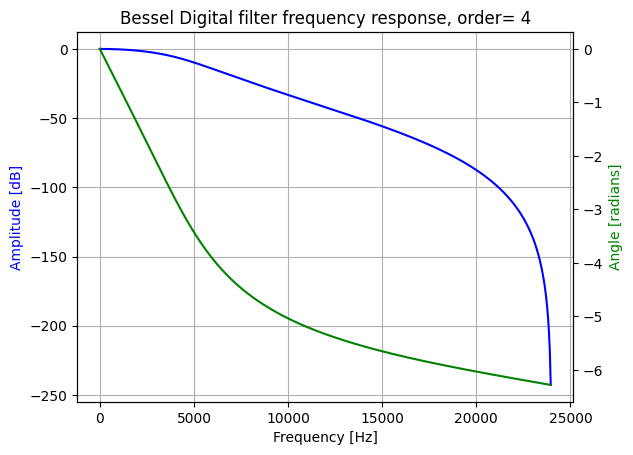

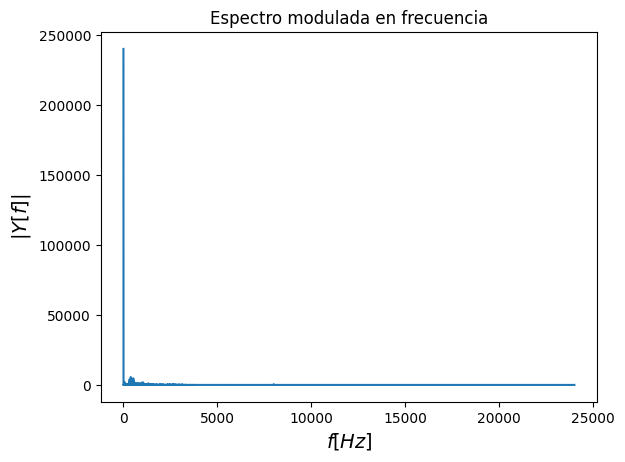

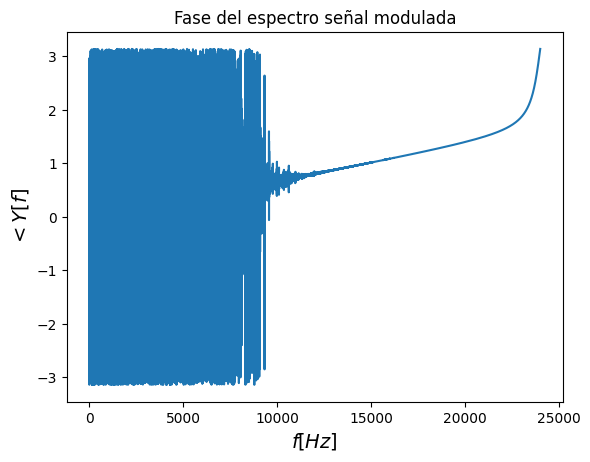

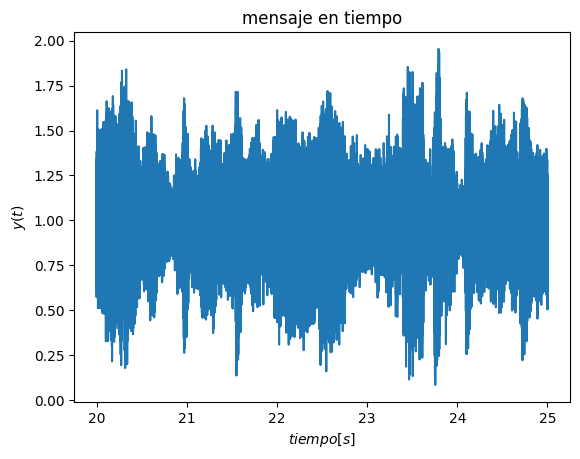

In [102]:
# Parametros y ajustes del filtro
normalization = 'mag' #Ajusta la frecuencia crítica según la respuesta que se desea
num, den= bessel(N, Wn=3000, btype=filt, norm=normalization, fs=fs) #regresa numerador y denominador. Si se quiere obtener los polos y ceros usar scipy.signal.tf2zpk
w, h = freqz(num, den, fs=fs)
caf = filtfilt(num, den, ca, axis=0)


plot_freq_response('Bessel', w, h, N)

cafr = (2/Ac)*caf

#Fourier mensaje
Ywa = np.fft.rfft(cafr) # Se calcula la rfft de y
#Vf = np.fft.rfftfreq((y.shape[0],1/fs))
plt.plot(vf,abs(Ywa))#se grafica la magnitud
plt.title(r'Espectro modulada en frecuencia')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Ywa))#fase del espectro con la funcion angle() de numpy
plt.title(r'Fase del espectro señal modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()

plt.plot(tt,cafr) #graficar señal  en el tiempo
plt.title(r'mensaje en tiempo')
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

Audio(cafr.T,rate=fs)


<font color='green'>**Final mente se tiene el filtro chevysev 1, se siguen los pasos anteriores**
</font>


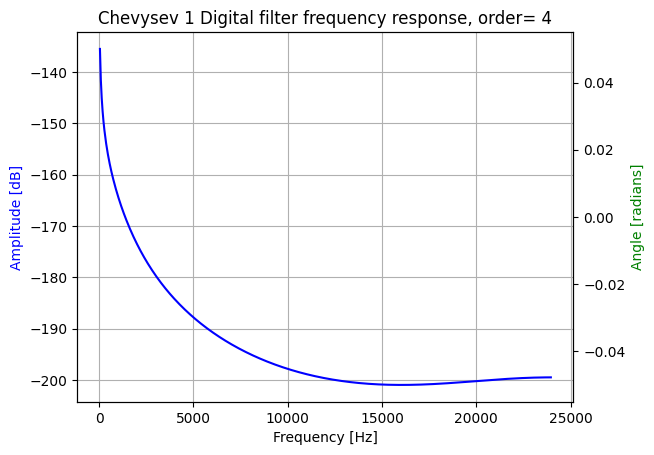

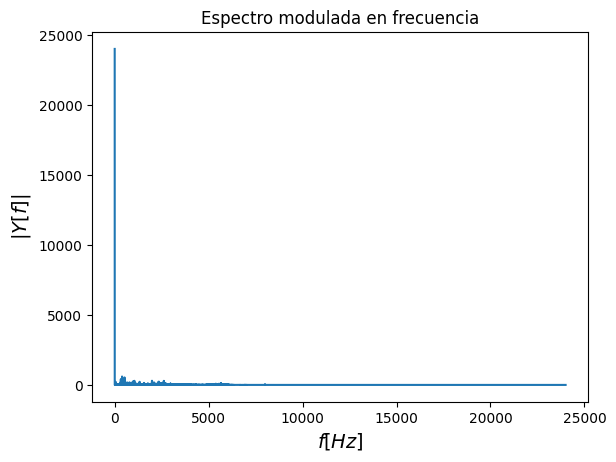

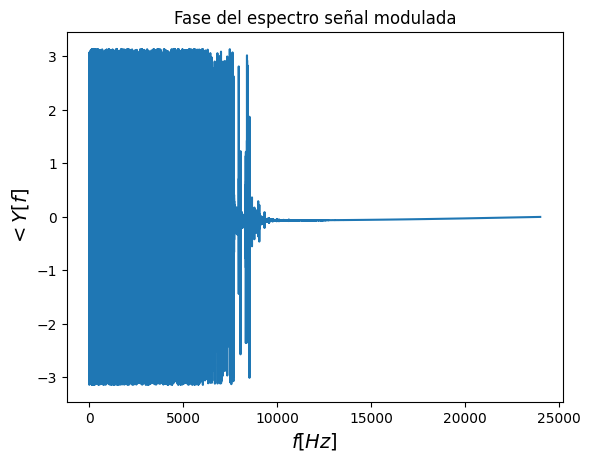

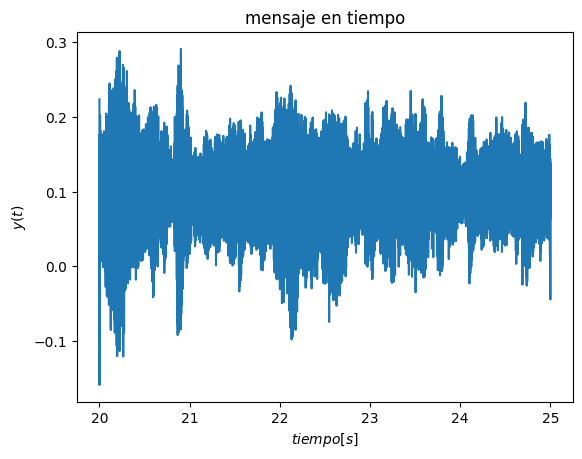

In [113]:

ripple = 10
zeros, poles= cheby1(N, rp=ripple, Wn=6000, btype=filt,fs=fs)
w, h = freqz_zpk(zeros, poles, gain, fs=fs)
caf = filtfilt(zeros, poles, ca, axis=0)

plot_freq_response('Chevysev 1', w, h, N)

cafr = (2/Ac)*caf
#Fourier señal modulada
Ywa = np.fft.rfft(cafr) # Se calcula la rfft de y
#Vf = np.fft.rfftfreq((y.shape[0],1/fs))
plt.plot(vf,abs(Ywa))#se grafica la magnitud
plt.title(r'Espectro modulada en frecuencia')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Ywa))#fase del espectro con la funcion angle() de numpy
plt.title(r'Fase del espectro señal modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()

plt.plot(tt,cafr) #graficar señal  en el tiempo
plt.title(r'mensaje en tiempo')
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

Audio(cafr.T,rate=fs)
